In [1]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import pandas as pd
from pathlib import Path
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from geopandas.tools import sjoin
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
import pysal as ps

C:\Users\eric\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
harris_county = geopandas.read_file('../data/rawdata/tracts.json')
harris_county.head()

In [52]:
harris_county_tract_codes = geopandas.read_file('../data/rawdata/harris_co_tract_codes.csv')
harris_county_tract_codes.head()

,state,county,tract,tractname,block,tractcode,blockcode,geometry
0,48,201,100000,1000,1000,48201100000,482011000001000,None
1,48,201,100000,1000,1001,48201100000,482011000001001,None
2,48,201,100000,1000,1002,48201100000,482011000001002,None
3,48,201,100000,1000,1003,48201100000,482011000001003,None
4,48,201,100000,1000,1004,48201100000,482011000001004,None


In [3]:
harris_county.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
0,48029110100,-98.5017,29.4142,-98.4805,29.4385,1101,"Bexar County, Texas",3319.03,37.48,1523.0,...,1.88,0.06,63.0,42.0,2.09,3.13,1.0,0.0,0.0,"(POLYGON ((-98.49591599999999 29.435767, -98.4..."
1,48029110300,-98.4895,29.4068,-98.4732,29.4222,1103,"Bexar County, Texas",2588.00,32.92,628.0,...,1.09,0.00,29.0,22.0,2.28,3.00,1.0,0.0,0.0,"(POLYGON ((-98.48687200000001 29.407662, -98.4..."
2,48029110500,-98.5152,29.4112,-98.5017,29.4228,1105,"Bexar County, Texas",2073.00,58.13,566.0,...,0.00,0.00,25.0,12.0,1.85,3.86,1.0,0.0,0.0,"(POLYGON ((-98.51382700000001 29.422633, -98.5..."
3,48029120300,-98.4819,29.4682,-98.4592,29.4962,1203,"Bexar County, Texas",7317.62,3.51,1061.0,...,2.71,0.00,9.0,8.0,0.72,0.81,1.0,0.0,0.0,"(POLYGON ((-98.460683 29.468212, -98.463627 29..."
4,48029120702,-98.4819,29.4912,-98.4591,29.5081,1207.02,"Bexar County, Texas",4261.38,5.51,1153.0,...,2.19,0.00,15.0,14.0,0.97,1.04,1.0,0.0,0.0,"(POLYGON ((-98.481872 29.491166, -98.481607999..."


In [40]:
type(harris_county.reset_index())

geopandas.geodataframe.GeoDataFrame

In [4]:
type(harris_county)

geopandas.geodataframe.GeoDataFrame

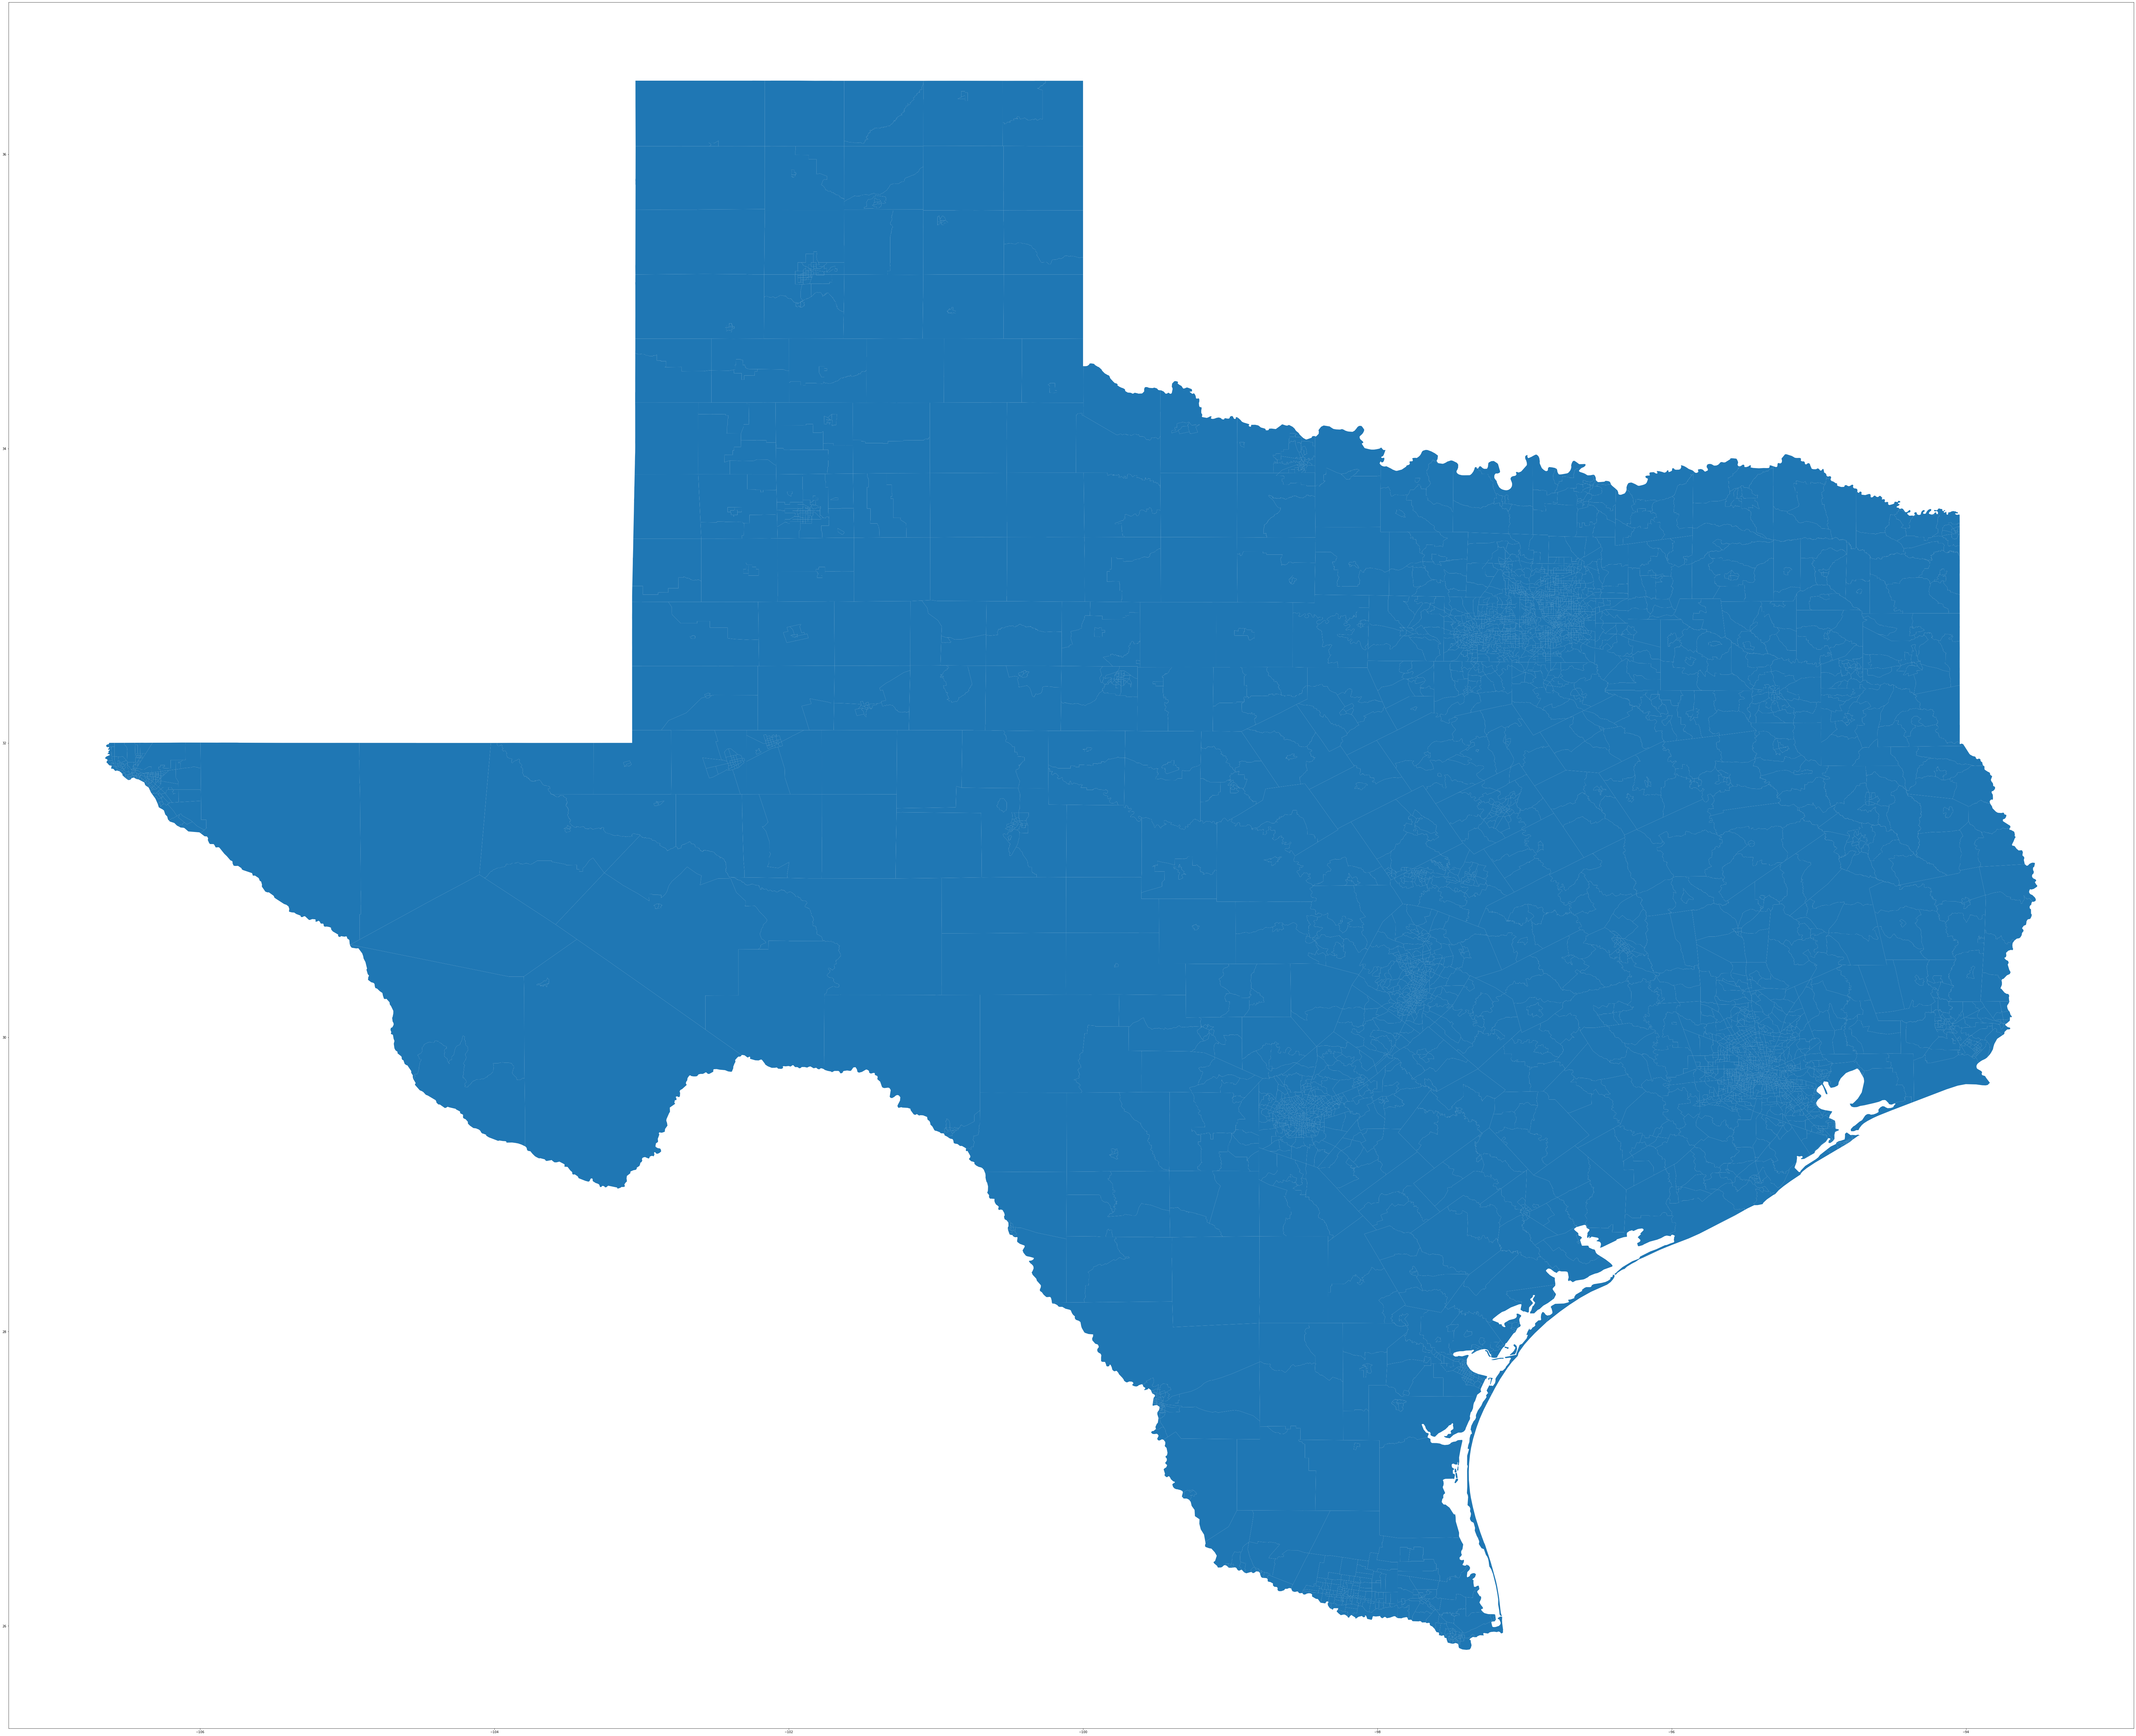

In [50]:
harris_county.plot(figsize = (200,100))

In [6]:
join_data = pd.read_csv(Path('../data/cleandata/join_data.csv'))

In [31]:
FIPS_joined_data = join_data['FIPS']

In [35]:
test3 = pd.DataFrame()
test3

""


In [49]:
hc['GEOID'].isin(list(join_data["FIPS"])).sum()

0

In [53]:
hc['GEOID'].isin(list(harris_county_tract_codes["tractcode"])).sum()

786

In [46]:
hc = harris_county.reset_index()
test4 = hc[~hc['GEOID'].isin(list(join_data["FIPS"]))]
test4.shape

(5259, 399)

In [43]:
type(test4)

geopandas.geodataframe.GeoDataFrame

In [47]:
test4.shape

(5259, 399)

In [82]:
hc = harris_county.reset_index()
test5 = hc[hc['GEOID'].isin(list(harris_county_tract_codes["tractcode"]))]
test5.shape

(786, 399)

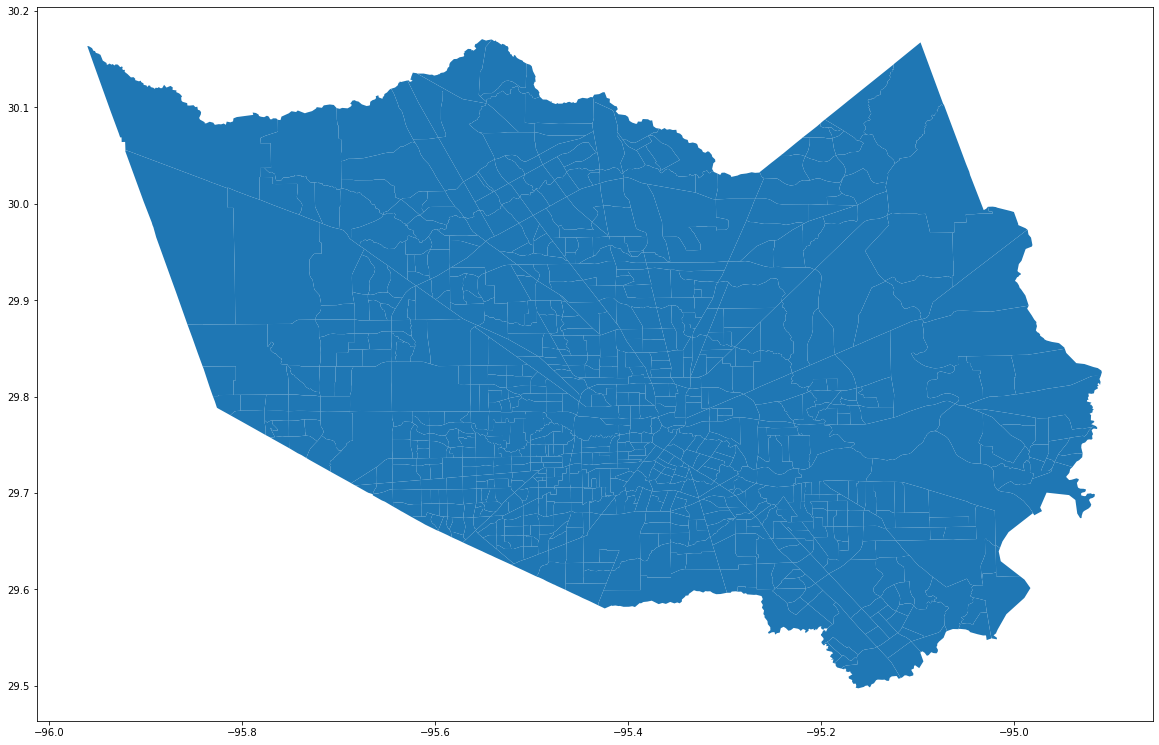

In [83]:
test5.plot(figsize = (20,20))

In [58]:
# merged = test5.merge(join_data_GEOID, on='GEOID')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [84]:
test5.dtypes

GEOID          object
west          float64
south         float64
east          float64
north         float64
n              object
pl             object
p-00          float64
pr-00         float64
roh-00        float64
pro-00        float64
mgr-00        float64
mhi-00        float64
mpv-00        float64
rb-00         float64
pw-00         float64
paa-00        float64
ph-00         float64
pai-00        float64
pa-00         float64
pnp-00        float64
pm-00         float64
po-00         float64
ef-00         float64
e-00          float64
er-00         float64
efr-00        float64
lf-00         float64
imputed-00    float64
subbed-00     float64
               ...   
e-15          float64
er-15         float64
efr-15        float64
lf-15         float64
imputed-15    float64
subbed-15     float64
p-16          float64
pr-16         float64
roh-16        float64
pro-16        float64
mgr-16        float64
mhi-16        float64
mpv-16        float64
rb-16         float64
pw-16     

In [69]:
#join_data_GEOID.reset_index(inplace=True)

# join_data_GEOID = join_data_GEOID.astype({"GEOID": object}) #converting data to object for GEOID

In [70]:
join_data_GEOID.dtypes

level_0                         int64
index                           int64
GEOID                          object
year                          float64
population                    float64
poverty-rate                  float64
median-household-income       float64
median-property-value         float64
evictions                     float64
eviction-rate                 float64
food_desert                   float64
Pct_in_100yr                  float64
Zip                           float64
Rating                        float64
Socioeconomic                 float64
Housing - Disability          float64
Minority Status - Language    float64
Housing - Transportation      float64
SVI INDEX                     float64
dtype: object

In [81]:
join_data_GEOID.drop(columns = ['level_0','index'], inplace=True)

In [74]:
merged = test5.merge(join_data_GEOID, on='GEOID')

In [75]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [77]:
merged

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,eviction-rate,food_desert,Pct_in_100yr,Zip,Rating,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX


In [92]:
test5['GEOID'].isin(list(join_data_GEOID["GEOID"])).sum()

0

In [88]:
hc.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
0,48029110100,-98.5017,29.4142,-98.4805,29.4385,1101,"Bexar County, Texas",3319.03,37.48,1523.0,...,1.88,0.06,63.0,42.0,2.09,3.13,1.0,0.0,0.0,"(POLYGON ((-98.49591599999999 29.435767, -98.4..."
1,48029110300,-98.4895,29.4068,-98.4732,29.4222,1103,"Bexar County, Texas",2588.00,32.92,628.0,...,1.09,0.00,29.0,22.0,2.28,3.00,1.0,0.0,0.0,"(POLYGON ((-98.48687200000001 29.407662, -98.4..."
2,48029110500,-98.5152,29.4112,-98.5017,29.4228,1105,"Bexar County, Texas",2073.00,58.13,566.0,...,0.00,0.00,25.0,12.0,1.85,3.86,1.0,0.0,0.0,"(POLYGON ((-98.51382700000001 29.422633, -98.5..."
3,48029120300,-98.4819,29.4682,-98.4592,29.4962,1203,"Bexar County, Texas",7317.62,3.51,1061.0,...,2.71,0.00,9.0,8.0,0.72,0.81,1.0,0.0,0.0,"(POLYGON ((-98.460683 29.468212, -98.463627 29..."
4,48029120702,-98.4819,29.4912,-98.4591,29.5081,1207.02,"Bexar County, Texas",4261.38,5.51,1153.0,...,2.19,0.00,15.0,14.0,0.97,1.04,1.0,0.0,0.0,"(POLYGON ((-98.481872 29.491166, -98.481607999..."


In [85]:
join_data_GEOID.head()

,GEOID,year,population,poverty-rate,median-household-income,median-property-value,evictions,eviction-rate,food_desert,Pct_in_100yr,Zip,Rating,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX
0,48157670101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,2.0,NaN,NaN,NaN,NaN,NaN
1,48157670200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,5.0,NaN,NaN,NaN,NaN,NaN
2,48157670700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,3.0,NaN,NaN,NaN,NaN,NaN
3,48157672400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN
4,48157672601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN


In [89]:
test5.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
429,48201100000,-95.3746,29.7449,-95.3477,29.7706,1000,"Harris County, Texas",6678.33,40.41,1091.0,...,1.83,0.00,101.0,47.0,3.02,6.50,1.0,0.0,0.0,"(POLYGON ((-95.374493 29.752879, -95.374540999..."
430,48201210900,-95.3401,29.8001,-95.3241,29.8091,2109,"Harris County, Texas",1829.00,31.40,299.0,...,1.42,0.47,23.0,19.0,5.90,7.14,1.0,0.0,0.0,"(POLYGON ((-95.32422699999999 29.809072, -95.3..."
431,48201211000,-95.3401,29.7937,-95.3240,29.8015,2110,"Harris County, Texas",2178.00,43.80,473.0,...,0.00,0.00,26.0,14.0,2.73,5.08,1.0,0.0,0.0,"(POLYGON ((-95.32399700000001 29.793951, -95.3..."
432,48201211600,-95.3159,29.7744,-95.3074,29.7875,2116,"Harris County, Texas",3302.00,23.45,379.0,...,0.83,1.52,20.0,16.0,3.82,4.77,1.0,0.0,0.0,"(POLYGON ((-95.31591299999999 29.786763, -95.3..."
433,48201211900,-95.3074,29.7800,-95.2917,29.7876,2119,"Harris County, Texas",6424.00,28.20,513.0,...,0.00,0.00,5.0,5.0,0.79,0.79,1.0,0.0,0.0,"(POLYGON ((-95.307382 29.780137, -95.307382 29..."


In [93]:
test5['GEOID'].isin(list(hc["GEOID"])).sum()

786